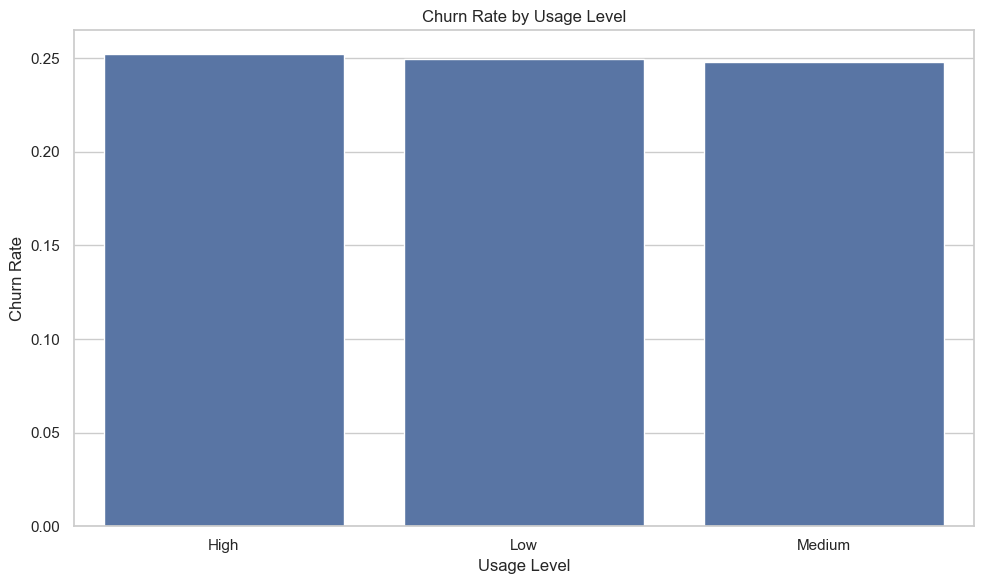

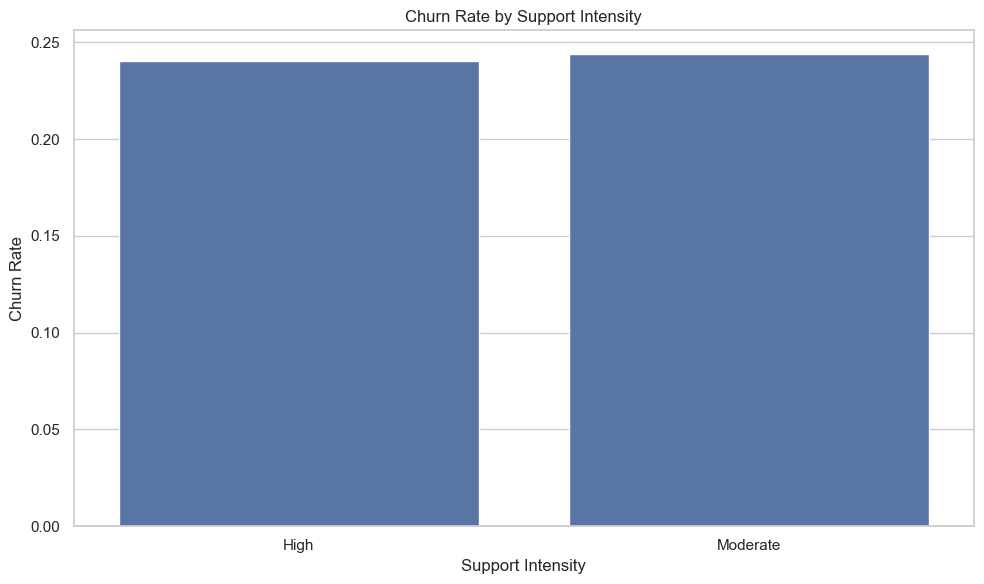

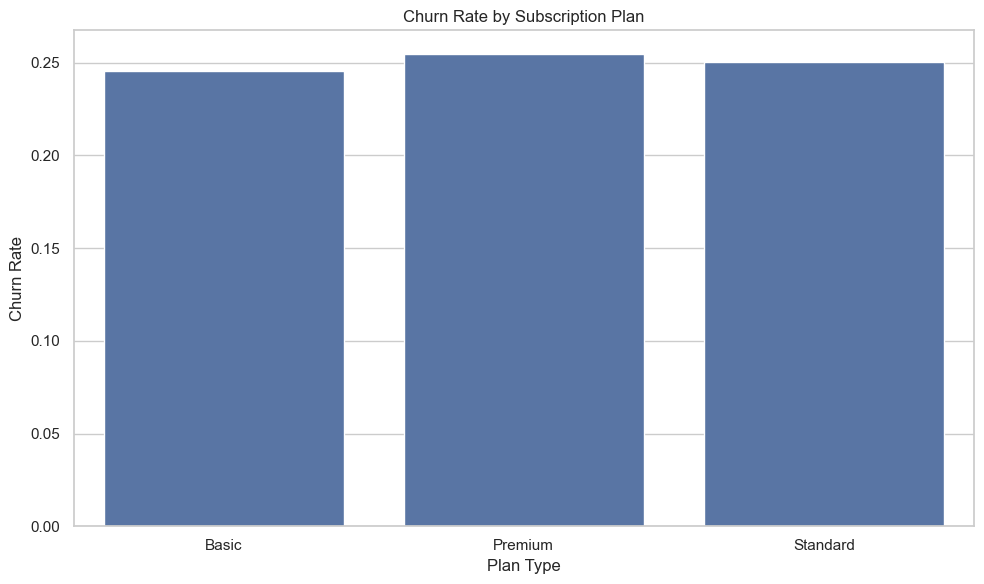

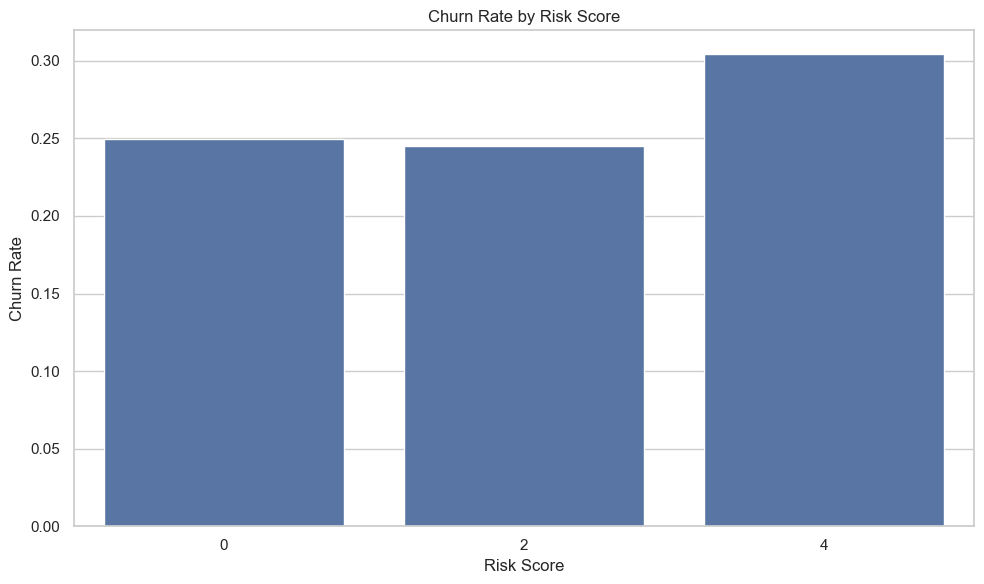

,customer_id,plan_type,usage_hours,ticket_count,tenure_days,risk_score
86,87,Premium,4.19,5,1705,4
318,319,Basic,3.74,5,1260,4
430,431,Basic,3.22,4,1438,4
460,461,Premium,3.94,4,1185,4
655,656,Basic,0.60,4,1776,4
664,665,Standard,1.74,4,1194,4
780,781,Basic,4.23,4,1469,4
795,796,Premium,4.76,6,1629,4
830,831,Premium,2.17,4,1126,4
916,917,Premium,2.51,4,1032,4


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("..")
df = pd.read_csv("data/cleaned/customer_analysis_dataset.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Overal churn rate
churn_rate = df["churned_flag"].mean()
churn_rate

# Churn by usage lavel
churn_by_usage = df.groupby("usage_level")["churned_flag"].mean().reset_index()

sns.barplot(data=churn_by_usage, x="usage_level", y="churned_flag")
plt.title("Churn Rate by Usage Level")
plt.ylabel("Churn Rate")
plt.xlabel("Usage Level")
plt.tight_layout()
plt.savefig("visuals/churn_by_usage.png")
plt.show()

# Churn by support intensity
churn_by_support = df.groupby("support_intensity")["churned_flag"].mean().reset_index()

sns.barplot(data=churn_by_support, x="support_intensity", y="churned_flag")
plt.title("Churn Rate by Support Intensity")
plt.ylabel("Churn Rate")
plt.xlabel("Support Intensity")
plt.tight_layout()
plt.savefig("visuals/churn_by_support.png")
plt.show()

# Churn by plan type
churn_by_plan = df.groupby("plan_type")["churned_flag"].mean().reset_index()

sns.barplot(data=churn_by_plan, x="plan_type", y="churned_flag")
plt.title("Churn Rate by Subscription Plan")
plt.ylabel("Churn Rate")
plt.xlabel("Plan Type")
plt.tight_layout()
plt.savefig("visuals/churn_by_plan.png")
plt.show()

# Churn risk score
df["risk_score"] = 0

df.loc[df["usage_level"] == "Low", "risk_score"] += 2
df.loc[df["support_intensity"] == "High", "risk_score"] += 2
df.loc[df["tenure_days"] < 180, "risk_score"] += 1

# Risk score vs actual churn
risk_churn = df.groupby("risk_score")["churned_flag"].mean().reset_index()

sns.barplot(data=risk_churn, x="risk_score", y="churned_flag")
plt.title("Churn Rate by Risk Score")
plt.ylabel("Churn Rate")
plt.xlabel("Risk Score")
plt.tight_layout()
plt.savefig("visuals/churn_by_risk_score.png")
plt.show()

# Identify high risk customers
high_risk_customers = df[df["risk_score"] >= 4][
    ["customer_id", "plan_type", "usage_hours", "ticket_count", "tenure_days", "risk_score"]
]

high_risk_customers.head(10)
